In [2]:
import h5py 
import scipy as sp
import re
import pdb
import os

import sys

import scipy as sp
import pylab as pl
from matplotlib import cm
import scipy.stats as st
import h5py
import pdb
import pandas as pd
import os
import cPickle
import sys
import numpy as np
sp.random.seed(0)
# import LIMIX
import limix
#import limix.modules.varianceDecomposition as var
#import limix.modules.qtl as qtl
#import limix.io.data as data
#import limix.io.genotype_reader as gr
#import limix.io.phenotype_reader as phr
#import limix.io.data_util as data_util
#import limix.utils.preprocess as preprocess
# plotting and visualization utilties
# from limix.utils.plot import *
# genotype summary stats
# from limix.deprecated.stats.geno_summary import *





ImportError: No module named LIMIX

In [9]:
# activiate inline plotting
%matplotlib inline

In [8]:
#file_name = os.path.abspath("/Users/brooks/Documents/git/steinmetz-lab/general/S288CxYJM789.hdf5")
file_name = os.path.abspath("../../general/S288CxYJM789.hdf5")
geno_reader_SXYJM  = gr.genotype_reader_tables(file_name)
# M is a binary matrix [samples,genotypes]
MSXYJM = geno_reader_SXYJM.getGenotypes()
posSXYJM = geno_reader_SXYJM.getPos()['pos']
K = sp.dot(MSXYJM,MSXYJM.T)
K2 = sp.dot(MSXYJM[:,0:2],MSXYJM[:,0:2].T)

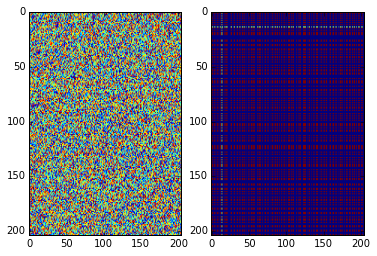

In [10]:
pl.subplot(121)
pl.imshow(K,aspect='auto')
pl.subplot(122)
pl.imshow(K2,aspect='auto')

In [18]:
afSXYJM = calc_AF(MSXYJM,minor=1)

plot=pl.hist(afSXYJM['af'],50,normed=True)
pl.ylabel('density')
pl.title('Yeast cross')
pl.xlabel('allele frequency')

NameError: name 'calc_AF' is not defined

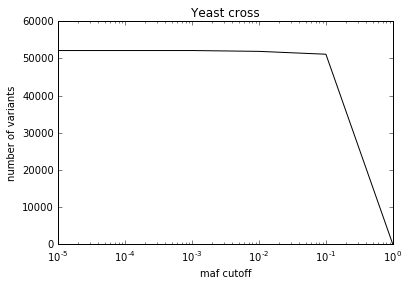

In [6]:
maf = 10.**(-sp.arange(6))

N   = [(afSXYJM['af']>=m).sum() for m in maf]
pl.plot(maf,N,'k-')
pl.xscale('log')
pl.xlabel('maf cutoff')
pl.ylabel('number of variants')
pl.title('Yeast cross')

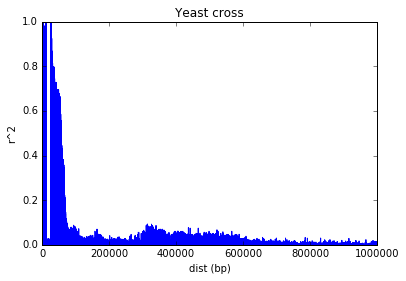

In [7]:
#Local LD plots

LDSXYJM = calc_LD(MSXYJM,posSXYJM.values)
pl.plot(LDSXYJM[0],LDSXYJM[1])
pl.ylabel('r^2')
pl.xlabel('dist (bp)')
pl.title('Yeast cross')

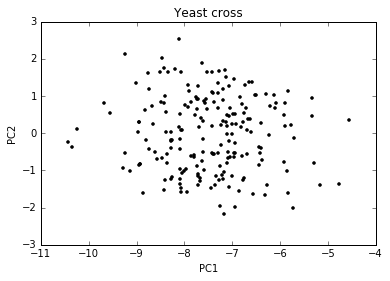

In [8]:
# PCA

import limix.deprecated.stats.pca as pca

[snpsX,snpsW] = pca.PCA(MSXYJM,components=10)
pl.plot(snpsX[:,0],snpsX[:,1],'k.')
pl.xlabel('PC1')
pl.ylabel('PC2')
pl.title('Yeast cross')